## Bài 2:
* Chỉnh các hyperparameter: learning rate, activation function, số hidden layer, số node. 
* Thử dùng các model đơn giản hơn (không có hidden layer, 1 hidden layer)
* Thử dùng các model phức tạp hơn (nhiều hidden layer và node hơn)
* Vẽ loss function theo epoch tương ứng.


### 2.1. Xây dựng lại bài toán

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras import backend as K

In [107]:
batch_size = 128
num_classes = 10
epochs = 12

In [108]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [109]:
x_train.shape, x_train[0].shape, y_train[0], x_test.shape, y_test[1]

((60000, 28, 28), (28, 28), 5, (10000, 28, 28), 2)

In [110]:
# Reshape lại dữ liệu
x_train = x_train.reshape(-1, 784) # N
x_test = x_test.reshape(-1, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize (0-1)
x_train /= 255.0
x_test /= 255.0
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [111]:
# one - hot coding
# convert class vectors to binary class matrices
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
print((784, ))

(784,)


In [112]:
# Định nghĩa model
model = Sequential()
# input_shape
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [113]:
# Compile model, chỉ rõ hàm loss được sử dụng, phương thức dùng để tối ưu loss
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(), # adam, .... gradient descent
              metrics=['accuracy'])

In [114]:
# Traning, fit với data
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 4s 8ms/step - loss: 1.6344 - accuracy: 0.5291 - val_loss: 0.5556 - val_accuracy: 0.8620
Epoch 2/12
469/469 [==============================] - 3s 7ms/step - loss: 0.5184 - accuracy: 0.8677 - val_loss: 0.3850 - val_accuracy: 0.8969
Epoch 3/12
469/469 [==============================] - 3s 7ms/step - loss: 0.3836 - accuracy: 0.8967 - val_loss: 0.3252 - val_accuracy: 0.9111
Epoch 4/12
469/469 [==============================] - 3s 7ms/step - loss: 0.3304 - accuracy: 0.9088 - val_loss: 0.2948 - val_accuracy: 0.9189
Epoch 5/12
469/469 [==============================] - 3s 7ms/step - loss: 0.3029 - accuracy: 0.9158 - val_loss: 0.2757 - val_accuracy: 0.9236
Epoch 6/12
469/469 [==============================] - 3s 7ms/step - loss: 0.2840 - accuracy: 0.9205 - val_loss: 0.2596 - val_accuracy: 0.9271
Epoch 7/12
469/469 [==============================] - 3s 7ms/step - loss: 0.2607 - accuracy: 0.9265 - val_loss: 0.2455 - val_accuracy: 0.9314
Epoch 

In [115]:
# H.history['loss'], 'accuracy', 'val_loss', 'val_accuracy'
H.history['val_accuracy']

[0.8619999885559082,
 0.8968999981880188,
 0.9110999703407288,
 0.9189000129699707,
 0.9236000180244446,
 0.9271000027656555,
 0.9314000010490417,
 0.9343000054359436,
 0.9362999796867371,
 0.9387999773025513,
 0.9404000043869019,
 0.9431999921798706]

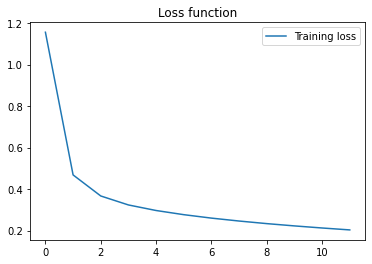

In [116]:
# Vẽ đồ thị loss của tập train
fig = plt.figure()
numOfEpoch = epochs
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='Training loss')
plt.title('Loss function')
plt.xlabel = "Epoch"
plt.ylabel = "Loss"
plt.legend()

In [117]:
# Đánh giá model với dữ liệu test
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19989722967147827
Test accuracy: 0.9431999921798706


Giá trị dự đoán:  7


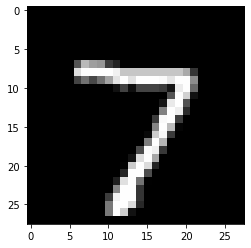

In [119]:
# 10. Dự đoán ảnh
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(x_test[0].reshape(-1, 784))
print('Giá trị dự đoán: ', np.argmax(y_predict))

### 2.2. Chỉnh các hyperparameter và thử các model khác.

In [69]:
# 1. Khai báo các tham số
batch_size = 128
num_classes = 10
epochs = 12

In [72]:
# 2. Load dữ liệu
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [74]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [75]:
# 3. Chia lại tập traning, validation
x_val, y_val = x_train[50000:60000, :], y_train[50000:60000]
x_train, y_train = x_train[:50000, :], y_train[:50000]

In [77]:
print(x_train.shape, y_train.shape)

(50000, 28, 28) (50000,)


In [78]:
# 4. Reshape lại dữ liệu cho đúng kích thước input của neural network
x_train = x_train.reshape(-1, 784) # N
x_val = x_val.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

# normalize (0-1)
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'val samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 val samples
10000 test samples


In [79]:
# 5. One-hot coding
# convert class vectors to binary class matrices
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 1. Model 0 hidden layer

In [82]:
# 6. Định nghĩa model 0 hidden layer
model_1 = Sequential()
# input_shape
model_1.add(Dense(num_classes, activation='softmax', input_shape=(784,)))

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Compile model, chỉ rõ hàm loss được sử dụng, phương thức dùng để tối ưu loss
model_1.compile(loss='categorical_crossentropy', # đi cùng với softmax
              optimizer=SGD(), # adam, .... gradient descent
              metrics=['accuracy'])

In [85]:
# Traning, fit với data
H1 = model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/12
391/391 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8906 - val_loss: 0.3650 - val_accuracy: 0.9029
Epoch 2/12
391/391 [==============================] - 1s 3ms/step - loss: 0.3961 - accuracy: 0.8919 - val_loss: 0.3597 - val_accuracy: 0.9035
Epoch 3/12
391/391 [==============================] - 1s 3ms/step - loss: 0.3905 - accuracy: 0.8932 - val_loss: 0.3550 - val_accuracy: 0.9040
Epoch 4/12
391/391 [==============================] - 1s 3ms/step - loss: 0.3855 - accuracy: 0.8945 - val_loss: 0.3509 - val_accuracy: 0.9051
Epoch 5/12
391/391 [==============================] - 1s 3ms/step - loss: 0.3809 - accuracy: 0.8952 - val_loss: 0.3473 - val_accuracy: 0.9047
Epoch 6/12
391/391 [==============================] - 1s 3ms/step - loss: 0.3768 - accuracy: 0.8959 - val_loss: 0.3438 - val_accuracy: 0.9067
Epoch 7/12
391/391 [==============================] - 1s 3ms/step - loss: 0.3730 - accuracy: 0.8969 - val_loss: 0.3408 - val_accuracy: 0.9070
Epoch 

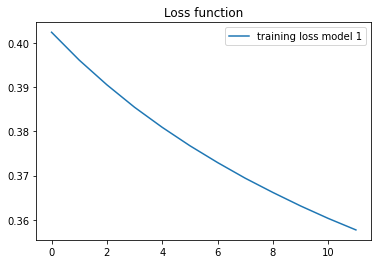

In [122]:
# Vẽ đồ thị loss với epoch
fig = plt.figure()
numOfEpoch = epochs
plt.plot(np.arange(0, numOfEpoch), H1.history['loss'], label='training loss model 1')
plt.title('Loss function')
plt.legend()

In [88]:
# Đánh giá model với dữ liệu test
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33603188395500183
Test accuracy: 0.9089999794960022


#### 2. Model 1 hidden layer, activation func = sigmoid, số node = 256

In [89]:
# Định nghĩa model
model_2 = Sequential()
# input_shape
model_2.add(Dense(256, activation='sigmoid', input_shape=(784,)))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Compile model, chỉ rõ hàm loss được sử dụng, phương thức dùng để tối ưu loss
model_2.compile(loss='categorical_crossentropy', # đi cùng với softmax
              optimizer='adam', # adam, .... gradient descent
              metrics=['accuracy'])

In [91]:
# Traning, fit với data
H2 = model_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/12
391/391 [==============================] - 3s 6ms/step - loss: 0.8752 - accuracy: 0.7803 - val_loss: 0.2851 - val_accuracy: 0.9219
Epoch 2/12
391/391 [==============================] - 2s 5ms/step - loss: 0.2899 - accuracy: 0.9193 - val_loss: 0.2249 - val_accuracy: 0.9370
Epoch 3/12
391/391 [==============================] - 2s 5ms/step - loss: 0.2285 - accuracy: 0.9348 - val_loss: 0.1898 - val_accuracy: 0.9467
Epoch 4/12
391/391 [==============================] - 2s 5ms/step - loss: 0.1917 - accuracy: 0.9448 - val_loss: 0.1644 - val_accuracy: 0.9541
Epoch 5/12
391/391 [==============================] - 2s 5ms/step - loss: 0.1589 - accuracy: 0.9548 - val_loss: 0.1459 - val_accuracy: 0.9579
Epoch 6/12
391/391 [==============================] - 2s 6ms/step - loss: 0.1336 - accuracy: 0.9625 - val_loss: 0.1294 - val_accuracy: 0.9634
Epoch 7/12
391/391 [==============================] - 2s 5ms/step - loss: 0.1183 - accuracy: 0.9666 - val_loss: 0.1212 - val_accuracy: 0.9659
Epoch 

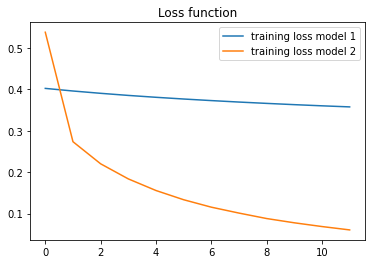

In [121]:
# Vẽ đồ thị loss với epoch
fig = plt.figure()
numOfEpoch = epochs
plt.plot(np.arange(0, numOfEpoch), H1.history['loss'], label='training loss model 1')
plt.plot(np.arange(0, numOfEpoch), H2.history['loss'], label='training loss model 2')
plt.title('Loss function')
plt.legend()

In [93]:
# Đánh giá model với dữ liệu test
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08864292502403259
Test accuracy: 0.9733999967575073


#### 3. Model nhiều hidden layer

In [132]:
# Định nghĩa model
model_3 = Sequential()
# input_shape
model_3.add(Dense(512, activation='tanh', input_shape=(784,)))
model_3.add(Dense(256, activation='tanh'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_34 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_35 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                330       
Total params: 552,106
Trainable params: 552,106
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Compile model, chỉ rõ hàm loss được sử dụng, phương thức dùng để tối ưu loss
model_3.compile(loss='categorical_crossentropy', # đi cùng với softmax
              optimizer='adam', # adam, .... gradient descent
              metrics=['accuracy'])

In [134]:
# Traning, fit với data
H3 = model_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/12
469/469 [==============================] - 6s 11ms/step - loss: 0.4603 - accuracy: 0.8656 - val_loss: 0.1101 - val_accuracy: 0.9691
Epoch 2/12
469/469 [==============================] - 5s 11ms/step - loss: 0.1165 - accuracy: 0.9644 - val_loss: 0.0738 - val_accuracy: 0.9775
Epoch 3/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0795 - accuracy: 0.9748 - val_loss: 0.0602 - val_accuracy: 0.9807
Epoch 4/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.0443 - val_accuracy: 0.9856
Epoch 5/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0359 - val_accuracy: 0.9892
Epoch 6/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0344 - val_accuracy: 0.9890
Epoch 7/12
469/469 [==============================] - 5s 12ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0245 - val_accuracy: 0.9919

<Figure size 432x288 with 0 Axes>

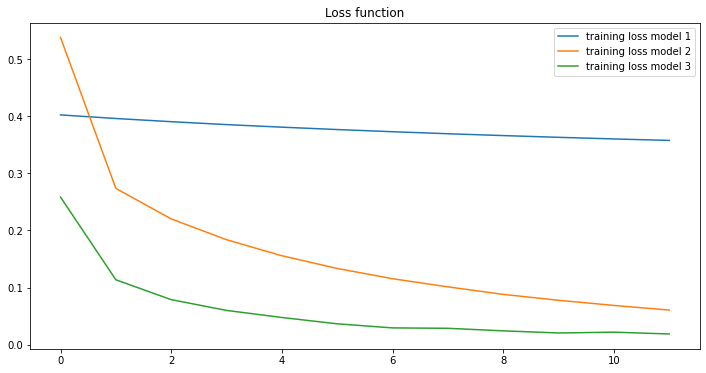

In [136]:
# Vẽ đồ thị loss với epoch
fig = plt.figure()
numOfEpoch = epochs
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, numOfEpoch), H1.history['loss'], label='training loss model 1')
plt.plot(np.arange(0, numOfEpoch), H2.history['loss'], label='training loss model 2')
plt.plot(np.arange(0, numOfEpoch), H3.history['loss'], label='training loss model 3')
plt.title('Loss function')
plt.legend()

In [135]:
# Đánh giá model với dữ liệu test
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08372209221124649
Test accuracy: 0.9790999889373779


Giá trị dự đoán:  7


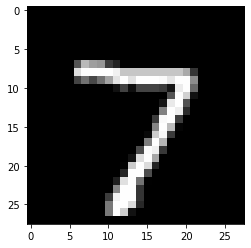

In [137]:
# Dự đoán ảnh
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

y_predict = model_3.predict(x_test[0].reshape(-1, 784))
print('Giá trị dự đoán: ', np.argmax(y_predict))